https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [44]:
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, RandomizedSearchCV  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance

from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier for modeling

# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    classification_report,  # To generate a detailed classification report
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves
    
)


%matplotlib inline

In [45]:
# From kaggle dataset
#df= pd.read_csv('/kaggle/input/diabetes-binary-health-indicators-brfss2015/diabetes_binary_health_indicators_BRFSS2015.csv')

In [46]:
df= pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [47]:
df.Income.value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

In [48]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Description of each features

Medical Conditions/Metrics:
- Diabetes_binary: Diabetes status (0: no diabetes, 1: diabetes)
- HighBP: High blood pressure (yes/no)
- HighChol: High cholesterol (yes/no)
- CholCheck: Cholesterol check in past 5 years (yes/no)
- BMI: Body Mass Index
- Stroke: Ever had a stroke (yes/no)
- HeartDiseaseorAttack: History of heart disease/attack (yes/no)

Lifestyle Factors:
- Smoker: Have you smoked 100 cigarettes in your life? (yes/no)
- PhysActivity: Physical activity in past 30 days (yes/no)
- Fruits: Consume fruit 1+ times per day (yes/no)
- Veggies: Consume vegetables 1+ times per day (yes/no)
- HvyAlcoholConsump: Heavy alcohol consumption (yes/no)

Healthcare Access:
- AnyHealthcare: Have any healthcare coverage (yes/no)
- NoDocbcCost: Could not see doctor due to cost (yes/no)

Health Status:
- GenHlth: General health rating (1-5 scale, 1=excellent, 5=poor)
- MentHlth: Days of poor mental health in past 30 days (0-30)
- PhysHlth: Days of poor physical health in past 30 days (0-30)
- DiffWalk: Difficulty walking/climbing stairs (yes/no)

Demographics:
- Sex: Gender
- Age: Age group (categorical)
- Education: Education level
- Income: Income level


In [49]:
df.shape

(253680, 22)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [51]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [52]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [53]:
df.duplicated().any()

True

In [54]:
df.duplicated().sum()

24206

In [55]:
# df.T.duplicated().any()

In [56]:
# df.T.duplicated().sum()

In [57]:
df.drop_duplicates(inplace=True)

In [58]:

df.shape

(229474, 22)

In [59]:
df.duplicated().sum()

0

# DATA VISUALIZATION

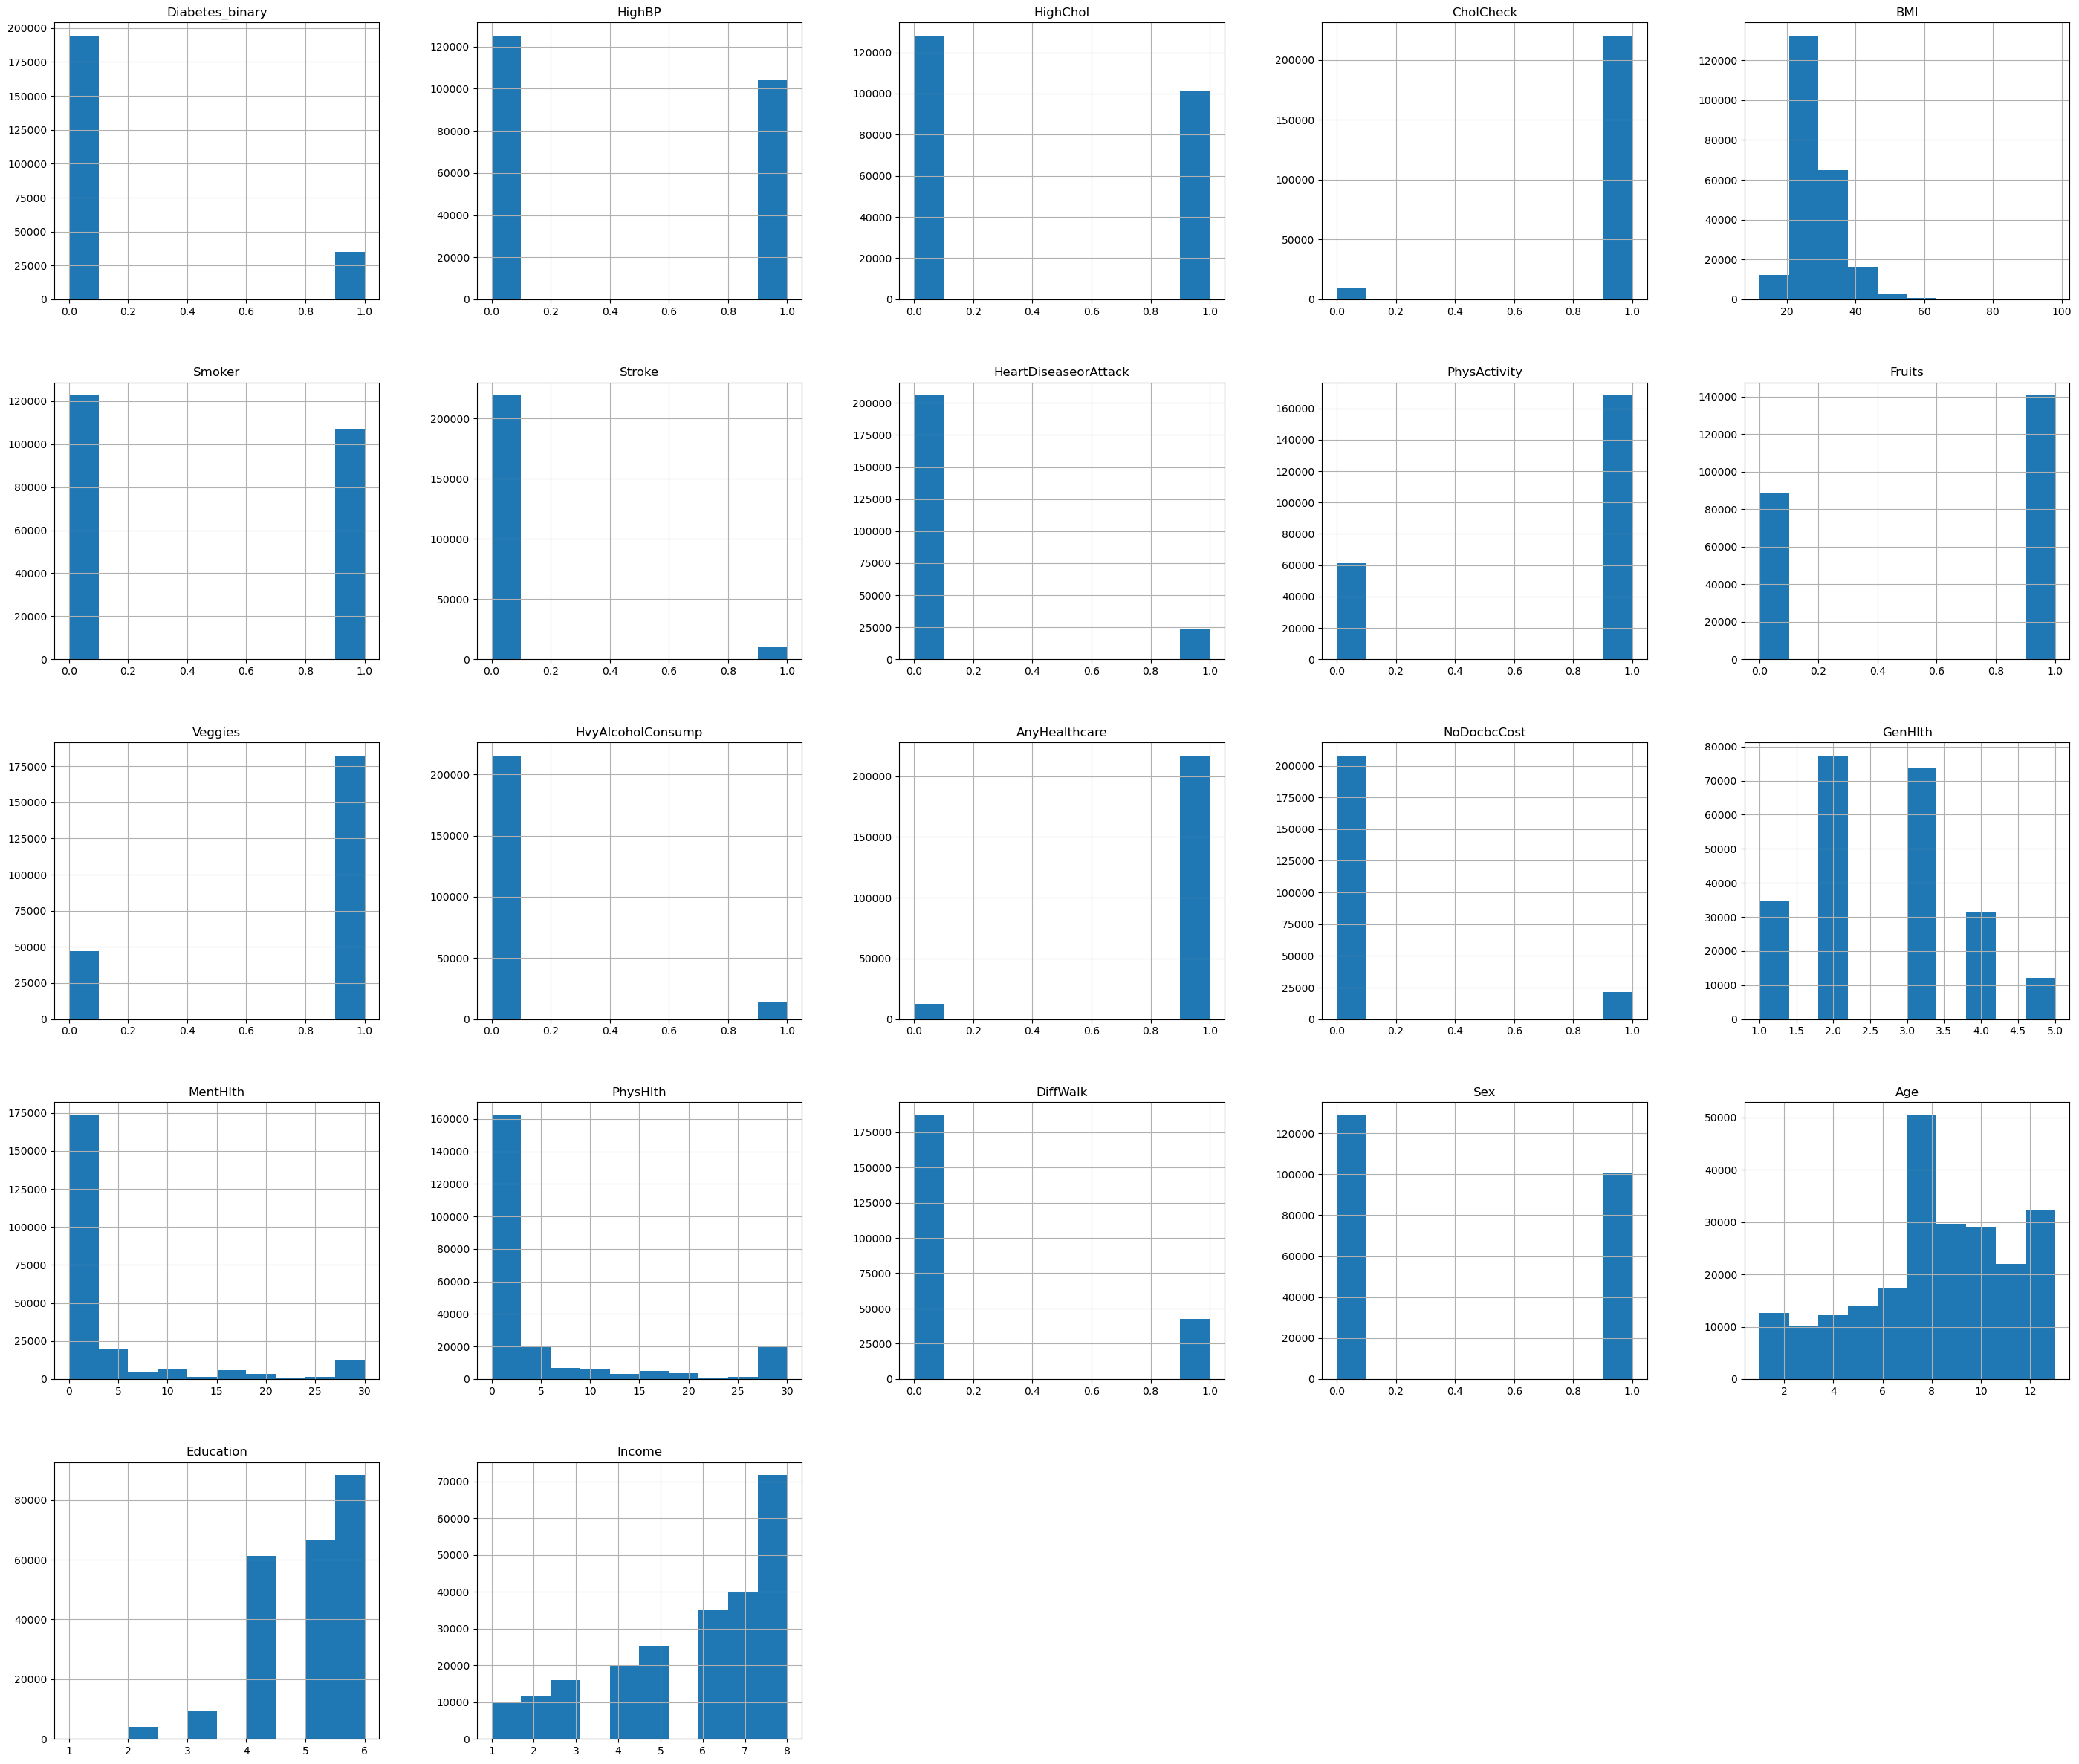

In [60]:
df.hist(figsize=(35,30));

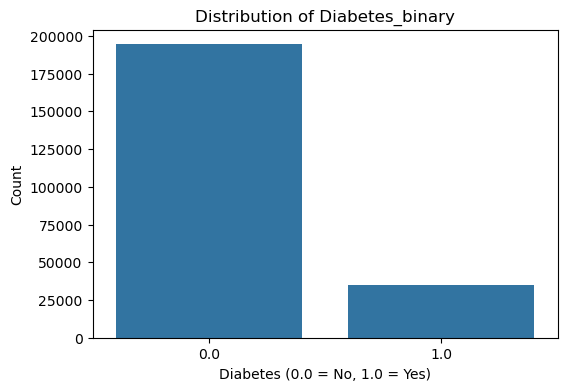

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes (0.0 = No, 1.0 = Yes)')
plt.ylabel('Count')
plt.show()

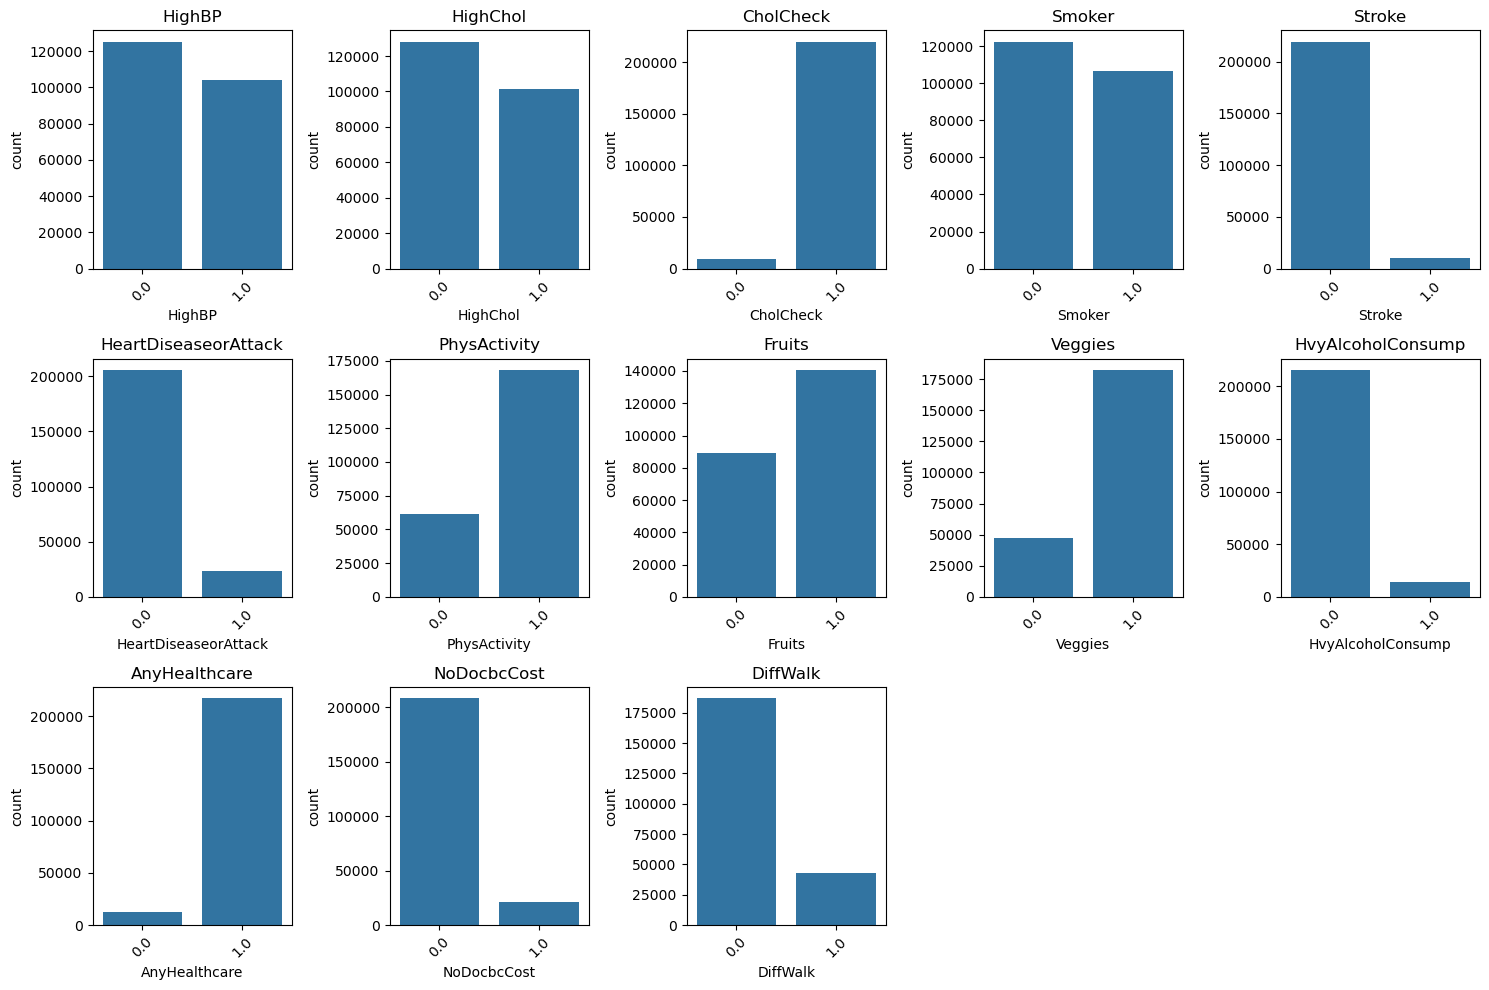

In [62]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

plt.figure(figsize=(15,10))
for i, feature in enumerate(binary_features):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


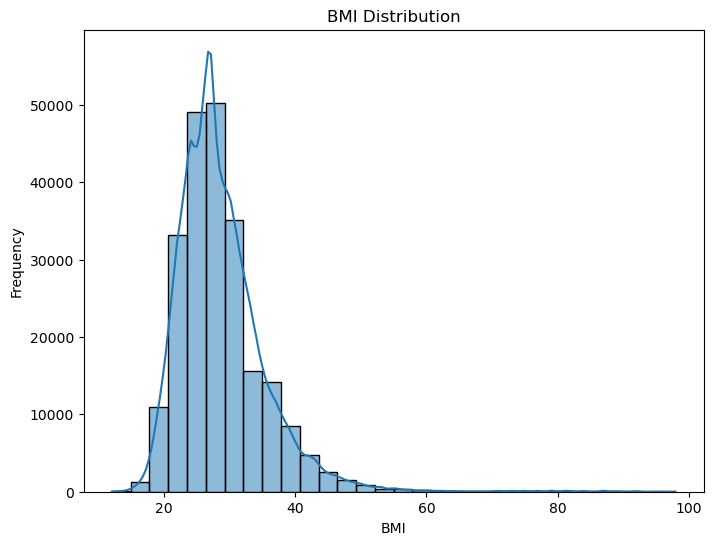

In [63]:
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


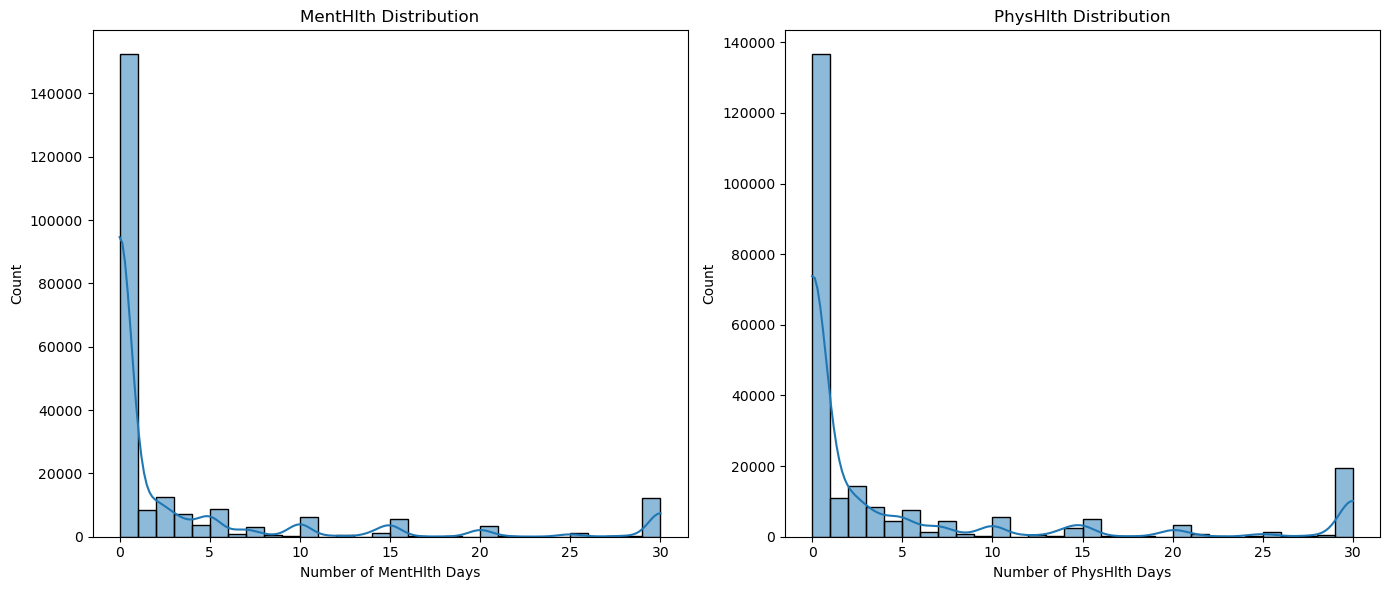

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(df['MentHlth'], kde=True, bins=30, ax=ax[0])
ax[0].set_title('MentHlth Distribution')
ax[0].set_xlabel('Number of MentHlth Days')

sns.histplot(df['PhysHlth'], kde=True, bins=30, ax=ax[1])
ax[1].set_title('PhysHlth Distribution')
ax[1].set_xlabel('Number of PhysHlth Days')

plt.tight_layout()
plt.show()

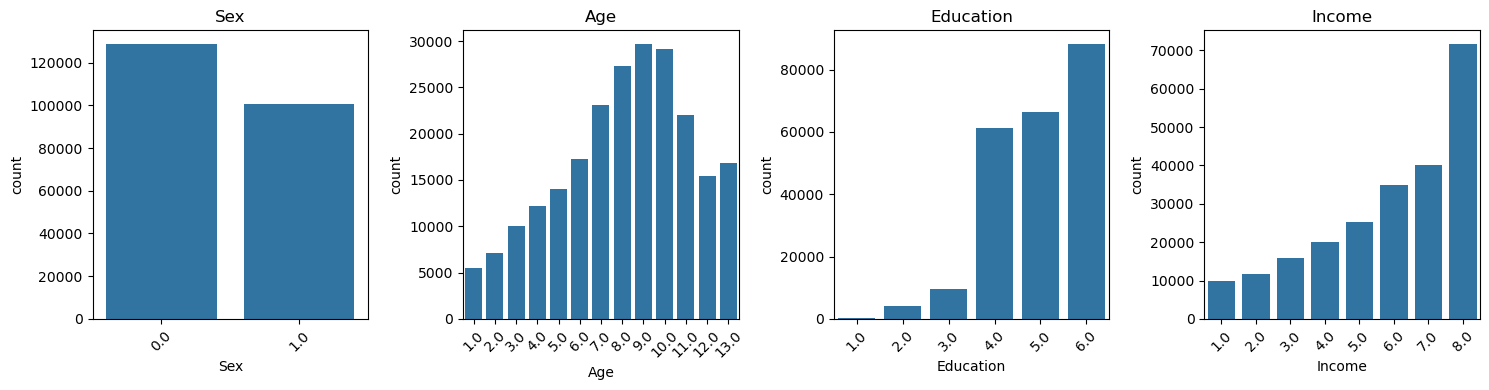

In [65]:
categorical_features = ['Sex', 'Age', 'Education', 'Income']
plt.figure(figsize=(15,4))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=feature, data=df, order=sorted(df[feature].unique()))
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


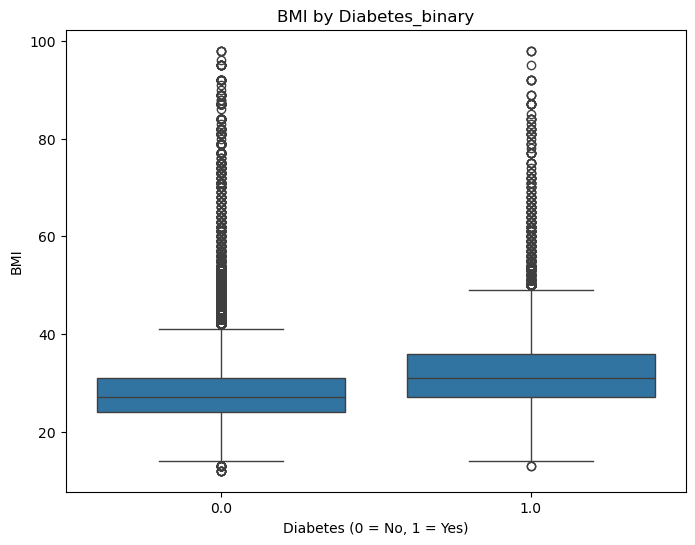

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI by Diabetes_binary')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')

plt.show()


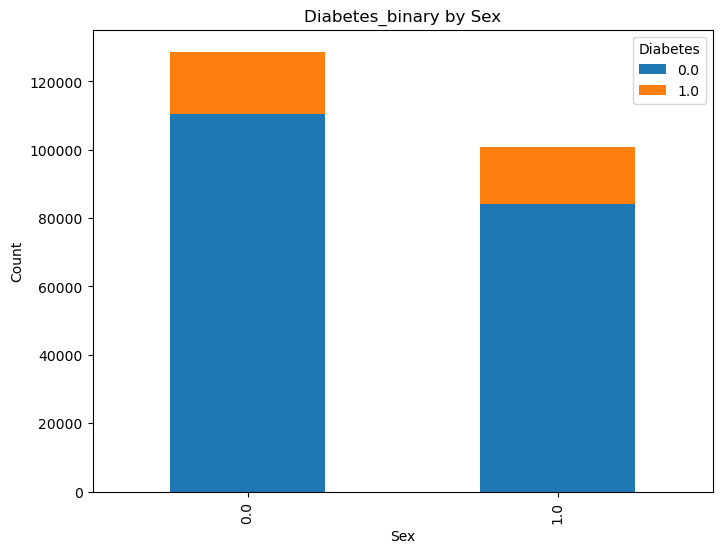

In [67]:
ct = pd.crosstab(df['Sex'], df['Diabetes_binary'])
ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Diabetes_binary by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()


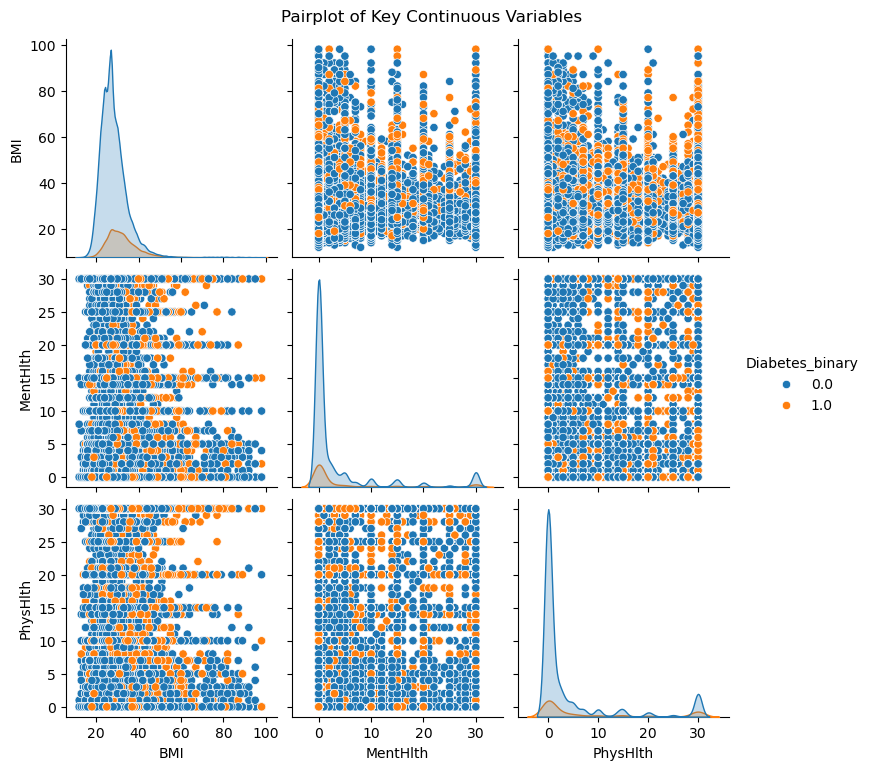

In [68]:
sns.pairplot(df[['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_binary']], hue='Diabetes_binary')
plt.suptitle('Pairplot of Key Continuous Variables', y=1.02)
plt.show()


# FEATURE SELECTION

I will consider how each individual features correlate with the target variable, their mutual information scores, and domain knowledge in season the features.

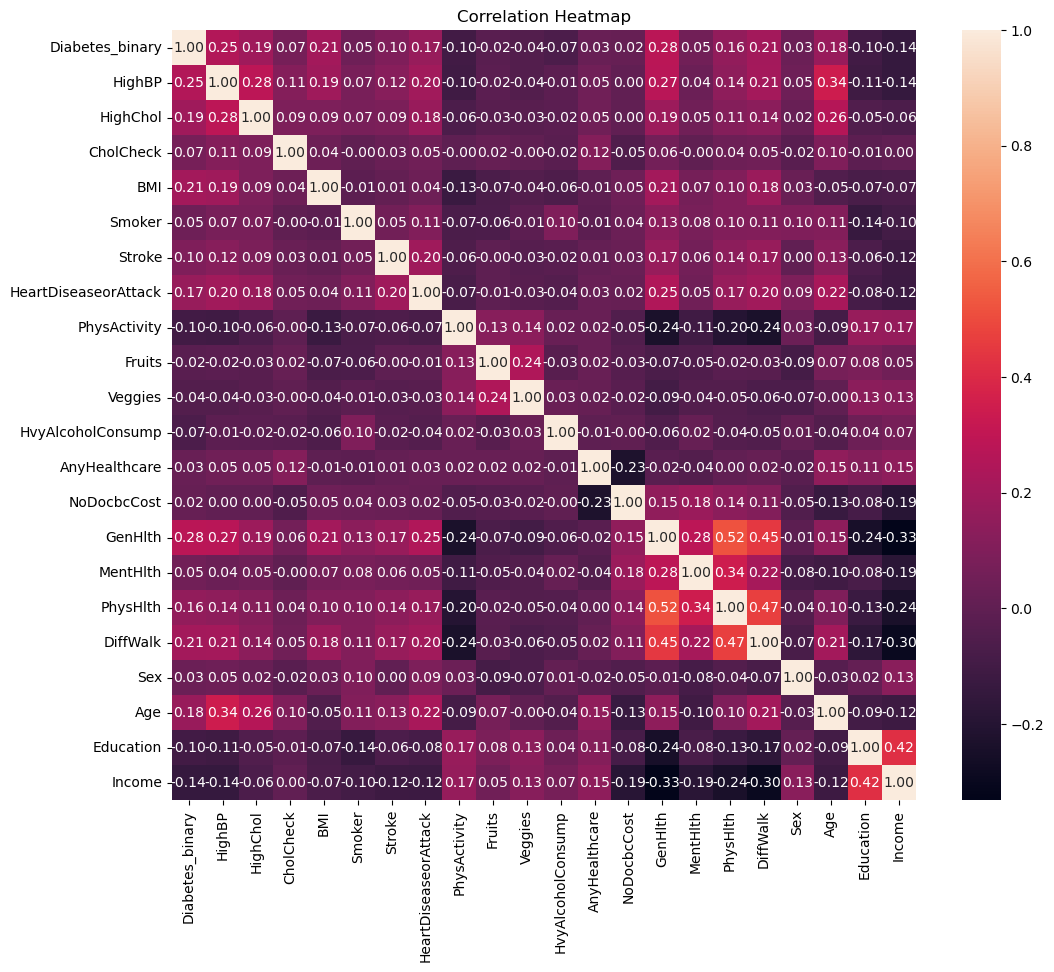

In [69]:
## Correlation matrix
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### Key Observations:
1. **Diabetes_binary and HighBP (Hypertension) (~0.25 correlation)**  
   - A moderate positive correlation suggests that people with high blood pressure have a higher likelihood of diabetes.
  
2. **Diabetes_binary and General Health (~0.28 correlation)**  
   - Poor general health is moderately associated with diabetes.
  
3. **HighBP and Age (~0.34 correlation)**  
   - As expected, older individuals tend to have higher blood pressure.
  
4. **HighBP and General Health (~0.27 correlation)**  
   - Poor general health is linked with higher blood pressure.
  
5. **General Health and Mental/Physical Health (~0.52, ~0.47 correlation respectively)**  
   - People reporting poor general health also report worse mental and physical health.
  
6. **Education and Income (~0.42 correlation)**  
   - Higher education is associated with higher income.

7. **Physical Activity and General Health (-0.24 correlation)**  
   - More physical activity is linked to better general health.

8. **Heavy Alcohol Consumption has weak correlations with most variables**  
   - This suggests it does not significantly impact most other health-related factors in this dataset.

In [70]:
# Removing Multicolinearity from the features if they exist

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(df,0.85)
corr_features

set()

In [71]:
# Removing highly correlated features if any exists
df = df.drop(columns=corr_features)

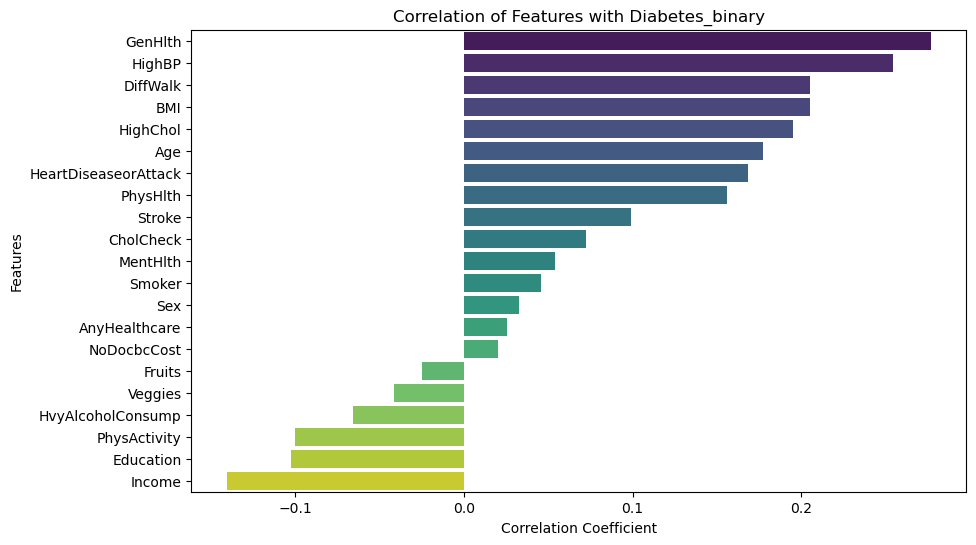

In [72]:
# Compute correlation matrix and select correlation with 'Diabetes_binary'
correlations = df.corr()['Diabetes_binary'].drop('Diabetes_binary')
correlations = correlations.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Diabetes_binary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Based on the coreletion relationship with the target GenHlth, HighBP, BMI, DiffWalk,  HighChol, Age,
HeartDiseaseorAttack, PhysHlth, Stroke, CholCheck, MentHlth, Smoker, Sex.

I would also pick HvyAlcoholConsump, PhysActivity, Education, Income because their negative correlation.


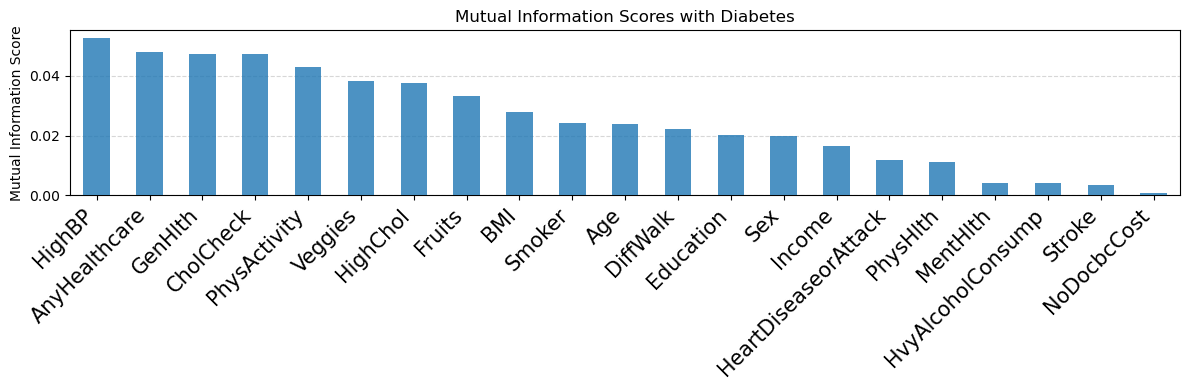


Mutual Information Scores:
HighBP                  0.052642
AnyHealthcare           0.048119
GenHlth                 0.047479
CholCheck               0.047308
PhysActivity            0.042875
Veggies                 0.038342
HighChol                0.037672
Fruits                  0.033217
BMI                     0.027772
Smoker                  0.024128
Age                     0.024027
DiffWalk                0.022169
Education               0.020381
Sex                     0.020001
Income                  0.016665
HeartDiseaseorAttack    0.011889
PhysHlth                0.011097
MentHlth                0.004081
HvyAlcoholConsump       0.004025
Stroke                  0.003496
NoDocbcCost             0.000667
dtype: float64


In [73]:
# Calculate mutual information scores

X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']  # Target

mi_scores = mutual_info_classif(X, y)

# Create a Series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 4))
mi_series.plot(kind='bar', alpha=0.8, zorder=3)
plt.title("Mutual Information Scores with Diabetes")
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation=45, ha='right', size=15)
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print the scores
print("\nMutual Information Scores:")
print(mi_series)

In [74]:
# Features selected by both methods

feature_correlation = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age',
         'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'CholCheck', 'MentHlth', 
         'Smoker', 'Sex', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']

mutual_information = ['HighBP', 'GenHlth', 'AnyHealthcare', 'CholCheck', 'PhysActivity', 
         'HighChol', 'Fruits', 'Veggies', 'BMI', 'Age', 'Smoker', 'DiffWalk', 'Sex']



# Combine lists and remove duplicates using set
combined_set = set(feature_correlation + mutual_information)

# Convert back to list for ordered representation
combined_features = list(combined_set)

print("Combined unique features as a list:")
print(combined_features)
print("\nNumber of unique features:", len(combined_features))
print("\nCombined unique features as a set:")
print(combined_set)
print("\nNumber of unique features:", len(combined_set))

Combined unique features as a list:
['PhysActivity', 'CholCheck', 'HighChol', 'GenHlth', 'PhysHlth', 'Stroke', 'MentHlth', 'BMI', 'Veggies', 'DiffWalk', 'Age', 'HvyAlcoholConsump', 'Smoker', 'HeartDiseaseorAttack', 'Sex', 'HighBP', 'Fruits', 'Education', 'Income', 'AnyHealthcare']

Number of unique features: 20

Combined unique features as a set:
{'PhysActivity', 'CholCheck', 'HighChol', 'GenHlth', 'PhysHlth', 'Stroke', 'MentHlth', 'BMI', 'Veggies', 'DiffWalk', 'Age', 'HvyAlcoholConsump', 'Smoker', 'HeartDiseaseorAttack', 'Sex', 'HighBP', 'Fruits', 'Education', 'Income', 'AnyHealthcare'}

Number of unique features: 20


In [75]:
data = df.copy()

In [76]:
df = data.copy()

In [78]:
# Making Final Feature Selection With Domain Knowledge
selected_features = ['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 
                     'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 
                     'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 
                     'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary']

In [79]:
df = df[selected_features]

In [80]:
df.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary'],
      dtype='object')

'Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'

# PREPROCESSING

In [81]:
# Separating features (X) and target (y) for 

X = df.drop("Diabetes_binary",axis=1)
y = df["Diabetes_binary"]

In [82]:
"""Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, stratify=df['Diabetes_binary'], random_state=42 )

# """Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# # Splitting the data into training and testing datasets
# = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [83]:
X_train.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [84]:
y_train.value_counts()

0.0    155501
1.0     28078
Name: Diabetes_binary, dtype: int64

In [85]:
# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling Completed!")

Scaling Completed!


In [106]:
import pickle
import os

save_folder = "saved_models"
# Save the scaler
with open(os.path.join(save_folder, "scaler.pkl"), "wb") as file:
    pickle.dump(scaler, file)

In [87]:
feature_names = X_train.columns
feature_names

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [88]:
# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with column names

In [89]:
X_train.head()

,PhysHlth,HvyAlcoholConsump,Smoker,CholCheck,Stroke,GenHlth,MentHlth,Sex,Income,BMI,PhysActivity,HeartDiseaseorAttack,AnyHealthcare,DiffWalk,HighChol,Veggies,Education,Age,HighBP,Fruits
0,-0.517047,-0.254765,1.072035,0.205176,-0.215734,-0.563578,-0.455262,1.13290,0.529942,-0.395435,0.601961,-0.338755,-4.187359,-0.477229,-0.889095,0.509271,0.020709,-0.350440,1.096408,-1.256327
1,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,0.375330,-0.455262,-0.88269,-1.381726,0.786628,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,-0.986375,0.620283,1.096408,-1.256327
2,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,1.007859,-0.690951,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,1.027793,0.620283,-0.912069,0.795971
3,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,-0.425892,-0.986467,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,0.020709,1.591006,-0.912069,0.795971
4,0.698722,-0.254765,-0.932805,0.205176,-0.215734,1.314239,-0.455262,-0.88269,-0.425892,0.195596,0.601961,-0.338755,0.238814,2.095428,-0.889095,0.509271,-0.986375,-0.350440,1.096408,0.795971


In [90]:
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 155501, 1.0: 28078})
Class distribution after SMOTE: Counter({0.0: 155501, 1.0: 155501})


In [91]:
len(X_train_balanced)

311002

# MODELLING AND PREDICTIONS

In [92]:

lr = LogisticRegression( random_state=42)

lr.fit(X_train_balanced, y_train_balanced)
y_pred = lr.predict(X_test)


In [93]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    percent = cm / cm.sum() * 100
    
    annotations = np.array([[f"{label}\n{val}\n({p:.1f}%)" 
                            for label, val, p in zip(row, vals, prow)] 
                          for row, vals, prow in zip(labels, cm, percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy: 0.72
Weighted Precision: 0.85
Weighted Recall: 0.72
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895


[[27524 11352]
 [ 1708  5311]]


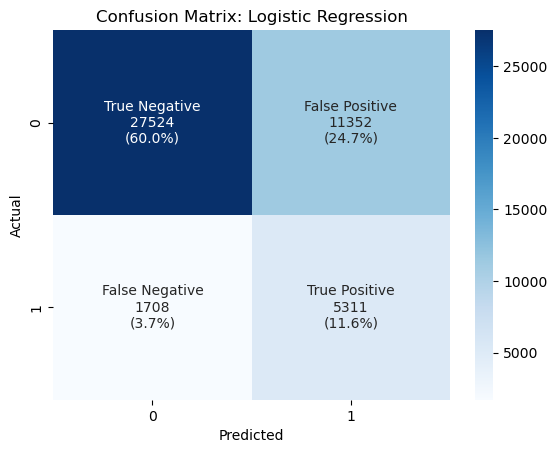

In [94]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred))

print()
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

In [95]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier()

In [96]:
dt_ypred = treeclassifier.predict(X_test)

Accuracy: 0.77
Weighted Precision: 0.78
Weighted Recall: 0.77
Weighted F1 Score: 0.78

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     38876
         1.0       0.28      0.33      0.30      7019

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895


[[33096  5780]
 [ 4718  2301]]


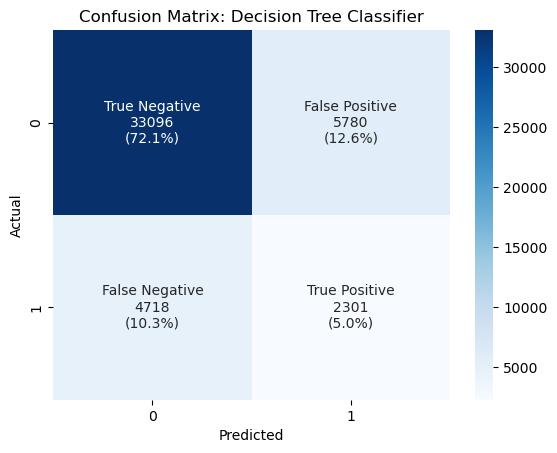

In [97]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, dt_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, dt_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, dt_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, dt_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, dt_ypred))

print()
print(confusion_matrix(y_test, dt_ypred))
plot_confusion_matrix(y_test, dt_ypred, "Decision Tree Classifier")

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
rf_ypred  = rf.predict(X_test)

Accuracy: 0.79
Weighted Precision: 0.84
Weighted Recall: 0.79
Weighted F1 Score: 0.81

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87     38876
         1.0       0.38      0.60      0.46      7019

    accuracy                           0.79     45895
   macro avg       0.65      0.71      0.67     45895
weighted avg       0.84      0.79      0.81     45895


[[31882  6994]
 [ 2778  4241]]


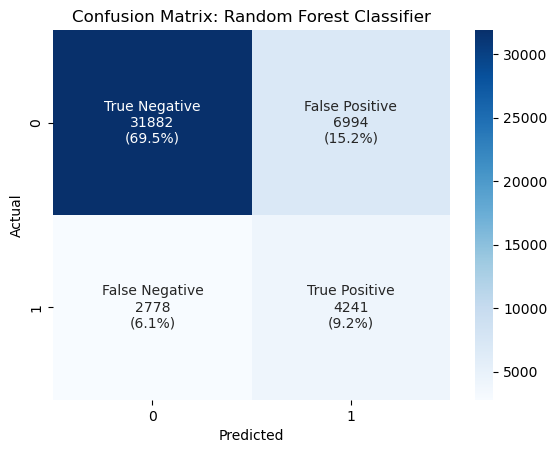

In [99]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, rf_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, rf_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, rf_ypred))

print()
print(confusion_matrix(y_test, rf_ypred))
plot_confusion_matrix(y_test, rf_ypred, "Random Forest Classifier")

# HYPERPARAMETER TUNING AND CROSS-VALIDATION

In [101]:

# Logistic Regression hyperparameters
param_distributions_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}

# Number of parameter settings that are sampled
n_iter_search = 20

# Number of cross-validation folds
cv = 5

In [102]:

# Setuping RandomizedSearchCV

# Logistic Regression
lr = LogisticRegression()
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_distributions_lr,
    n_iter=n_iter_search,
    cv=cv,
    random_state=42,
    n_jobs=-1
)
random_search_lr.fit(X_train_balanced, y_train_balanced)
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)
print("Best Logistic Regression CV Score:", random_search_lr.best_score_)


Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0018329807108324356}
Best Logistic Regression CV Score: 0.7398634273567318


Accuracy: 0.71
Weighted Precision: 0.85
Weighted Recall: 0.71
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895


[[27397 11479]
 [ 1679  5340]]


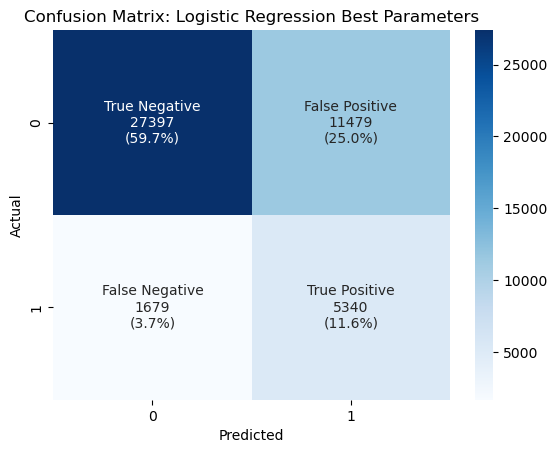

In [104]:

# Evaluate the best model on the test set

best_lr = random_search_lr.best_estimator_



y_pred_lr = best_lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_lr))

print()
print(confusion_matrix(y_test,y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Best Parameters")


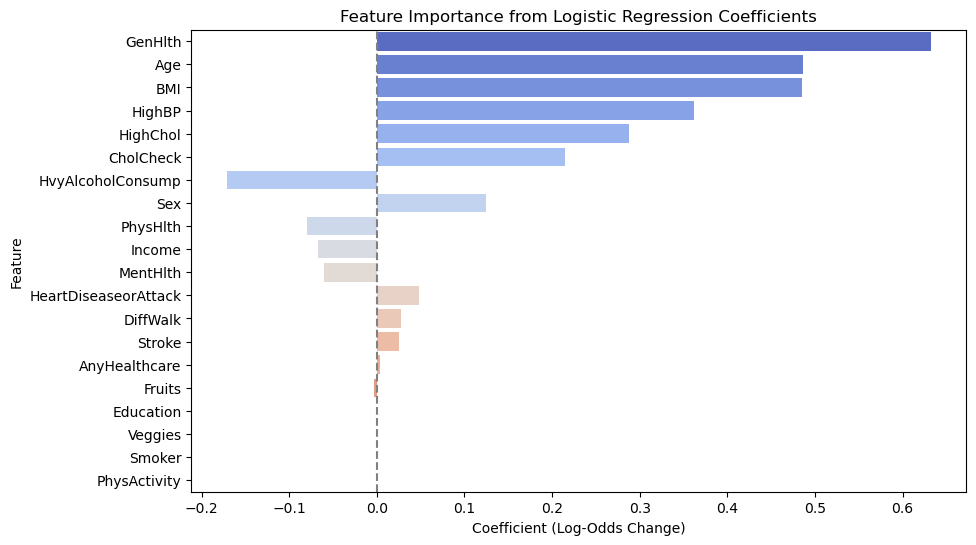

In [109]:
coefficients = best_lr.coef_[0]
features = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient (Log-Odds Change)')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [110]:
# Load the saved model
save_folder = "saved_models/"  # Replace with your actual folder path
model_path = os.path.join(save_folder, "diabetes_prediction.pkl")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


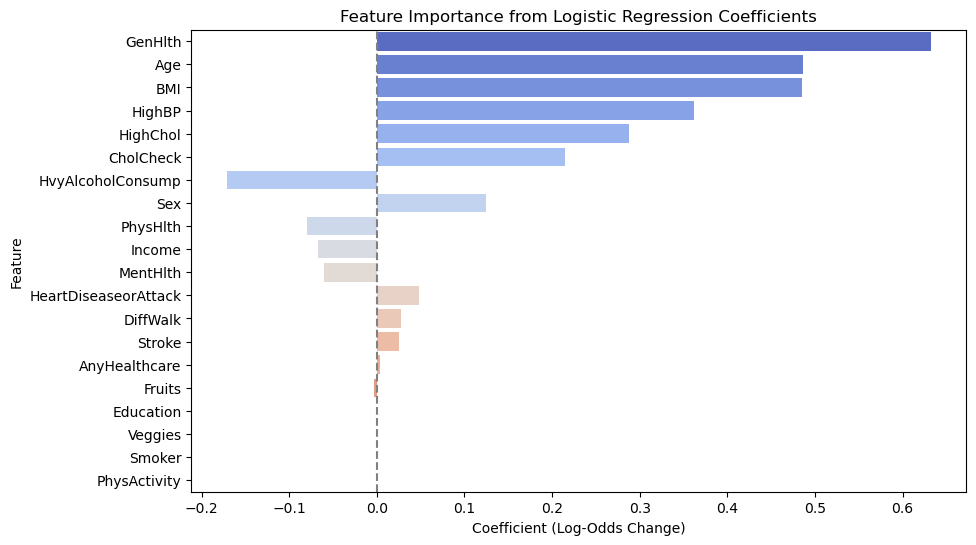

In [111]:
coefficients = loaded_model.coef_[0]
features = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient (Log-Odds Change)')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [105]:
# Saving The Models
import os
import pickle

# Creating a folder to save the best models if it doesn't exist
save_folder = "saved_models"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Saving the best models using pickle
with open(os.path.join(save_folder, "diabetes_prediction.pkl"), "wb") as file:
    pickle.dump(best_lr, file)


print(f"Model saved successfully in the '{save_folder}' folder.\n")

Model saved successfully in the 'saved_models' folder.





# Load the saved model
save_folder = "saved_models/"  # Replace with your actual folder path
model_path = os.path.join(save_folder, "best_logistic_regression.pkl")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

# Make predictions
# Assuming you have your X_test data ready
predictions = loaded_model.predict(X_test)
probabilities = loaded_model.predict_proba(X_test)

# Print some example predictions
print("\nFirst few predictions:")
print(predictions[:5])
print("\nFirst few prediction probabilities:")
print(probabilities[:5])

# You can also evaluate the model
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print()
print(confusion_matrix(y_test, predictions))

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"Weighted Precision: {precision_score(y_test,predictions, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, predictions, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, predictions, average='weighted'):.2f}")
print()
print(classification_report(y_test, predictions))

In [107]:
def print_value_counts(df):
    # Get the width of the longest column name for alignment
    max_len = max(len(col) for col in df.columns)
    
    print(f"\n{'='*80}")
    print("Value Counts for Each Feature")
    print(f"{'='*80}")
    
    for column in df.columns:
        # Print column name
        print(f"\n{column.ljust(max_len)}: {df[column].dtype}")
        print('-' * (max_len + 30))
        
        # Get value counts with percentages
        val_counts = df[column].value_counts(dropna=False)
        percentages = df[column].value_counts(normalize=True, dropna=False) * 100
        
        # Print each value count with percentage
        for val in val_counts.index:
            count = val_counts[val]
            percentage = percentages[val]
            print(f"{str(val).ljust(15)}: {str(count).rjust(7)} instances ({percentage:.2f}%)")
            
        # Print total
        print(f"\nTotal: {len(df[column])} instances")
        print(f"{'='*80}")

# Call the function
print_value_counts(df)


Value Counts for Each Feature

PhysHlth            : float64
--------------------------------------------------
0.0            :  136578 instances (59.52%)
30.0           :   19385 instances (8.45%)
2.0            :   14491 instances (6.31%)
1.0            :   11073 instances (4.83%)
3.0            :    8435 instances (3.68%)
5.0            :    7595 instances (3.31%)
10.0           :    5588 instances (2.44%)
15.0           :    4914 instances (2.14%)
7.0            :    4531 instances (1.97%)
4.0            :    4521 instances (1.97%)
20.0           :    3273 instances (1.43%)
14.0           :    2584 instances (1.13%)
25.0           :    1336 instances (0.58%)
6.0            :    1328 instances (0.58%)
8.0            :     809 instances (0.35%)
21.0           :     663 instances (0.29%)
12.0           :     578 instances (0.25%)
28.0           :     522 instances (0.23%)
29.0           :     215 instances (0.09%)
9.0            :     179 instances (0.08%)
18.0           :     152 i

0.0            :  128129 instances (55.84%)
1.0            :  101345 instances (44.16%)

Total: 229474 instances

Veggies             : float64
--------------------------------------------------
1.0            :  182337 instances (79.46%)
0.0            :   47137 instances (20.54%)

Total: 229474 instances

Education           : float64
--------------------------------------------------
6.0            :   88225 instances (38.45%)
5.0            :   66444 instances (28.95%)
4.0            :   61124 instances (26.64%)
3.0            :    9467 instances (4.13%)
2.0            :    4040 instances (1.76%)
1.0            :     174 instances (0.08%)

Total: 229474 instances

Age                 : float64
--------------------------------------------------
9.0            :   29678 instances (12.93%)
10.0           :   29093 instances (12.68%)
8.0            :   27272 instances (11.88%)
7.0            :   23121 instances (10.08%)
11.0           :   21993 instances (9.58%)
6.0            :   1728

In [108]:
df.GenHlth.value_counts()

2.0    77365
3.0    73632
1.0    34854
4.0    31545
5.0    12078
Name: GenHlth, dtype: int64

In [ ]:
import streamlit as st
import pickle
import pandas as pd
import os
import numpy as np

# Set page config
st.set_page_config(page_title="Diabetes Prediction App", layout="wide")

# Load the saved model and scaler
def load_model_and_scaler():
    try:
        model_path = os.path.join("saved_models", "diabetes_prediction.pkl")
        scaler_path = os.path.join("saved_models", "scaler.pkl")
        
        with open(model_path, "rb") as file:
            model = pickle.load(file)
        with open(scaler_path, "rb") as file:
            scaler = pickle.load(file)
            
        return model, scaler
    except Exception as e:
        st.error(f"Error loading model or scaler: {e}")
        return None, None

# Load model and scaler
model, scaler = load_model_and_scaler()

# Title and description
st.title("Diabetes Prediction System")
st.write("Enter your health information to predict diabetes risk")

# Create input sections using columns
col1, col2, col3 = st.columns(3)

with col1:
    st.subheader("Medical Conditions")
    highbp = st.selectbox("High Blood Pressure", ["No", "Yes"])
    highchol = st.selectbox("High Cholesterol", ["No", "Yes"])
    cholcheck = st.selectbox("Cholesterol Check in Past 5 Years", ["No", "Yes"])
    stroke = st.selectbox("Ever Had Stroke", ["No", "Yes"])
    heart_disease = st.selectbox("Heart Disease/Attack", ["No", "Yes"])
    bmi = st.number_input("BMI", min_value=10.0, max_value=70.0, value=25.0)

with col2:
    st.subheader("Lifestyle & Health Status")
    smoker = st.selectbox("Smoked 100+ Cigarettes in Life", ["No", "Yes"])
    phys_activity = st.selectbox("Physical Activity in Past 30 Days", ["No", "Yes"])
    fruits = st.selectbox("Consume Fruits 1+ Times per Day", ["No", "Yes"])
    veggies = st.selectbox("Consume Vegetables 1+ Times per Day", ["No", "Yes"])
    hvy_alcohol = st.selectbox("Heavy Alcohol Consumption", ["No", "Yes"])
    gen_health = st.selectbox("General Health (1=excellent, 5=poor)", [1, 2, 3, 4, 5])
    phys_health = st.number_input("Days of Poor Physical Health (0-30)", min_value=0, max_value=30, value=0)
    ment_health = st.number_input("Days of Poor Mental Health (0-30)", min_value=0, max_value=30, value=0)
    diff_walk = st.selectbox("Difficulty Walking/Climbing Stairs", ["No", "Yes"])

with col3:
    st.subheader("Demographics & Healthcare")
    sex = st.selectbox("Sex", ["Male", "Female"])
    age = st.selectbox("Age Group", list(range(1, 14)))  # Assuming age groups 1-13
    education = st.selectbox("Education Level", list(range(1, 7)))  # Assuming education levels 1-6
    income = st.selectbox("Income Level", list(range(1, 9)))  # Assuming income levels 1-8
    any_healthcare = st.selectbox("Have Healthcare Coverage", ["No", "Yes"])

# Create prediction button
if st.button("Predict Diabetes Risk"):
    # Convert Yes/No to 1/0
    binary_map = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}
    
    # Create input data dictionary
    input_data = {
        'PhysHlth': phys_health,
        'HvyAlcoholConsump': binary_map[hvy_alcohol],
        'Smoker': binary_map[smoker],
        'CholCheck': binary_map[cholcheck],
        'Stroke': binary_map[stroke],
        'GenHlth': gen_health,
        'MentHlth': ment_health,
        'Sex': binary_map[sex],
        'Income': income,
        'BMI': bmi,
        'PhysActivity': binary_map[phys_activity],
        'HeartDiseaseorAttack': binary_map[heart_disease],
        'AnyHealthcare': binary_map[any_healthcare],
        'DiffWalk': binary_map[diff_walk],
        'HighChol': binary_map[highchol],
        'Veggies': binary_map[veggies],
        'Education': education,
        'Age': age,
        'HighBP': binary_map[highbp],
        'Fruits': binary_map[fruits]
    }
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])
    
    if model is not None and scaler is not None:
        # Scale the features
        scaled_features = scaler.transform(input_df)
        
        # Make prediction
        prediction = model.predict(scaled_features)[0]
        prediction_proba = model.predict_proba(scaled_features)[0]
        
        # Display result
        st.subheader("Prediction Result")
        if prediction == 0:
            st.success("Based on the provided information, you likely don't have Diabetes.")
        else:
            st.warning("Based on the provided information, you might have Diabetes.")
        
        # Display probability
        st.write(f"Probability of having diabetes: {prediction_proba[1]:.2%}")
        
        # Add disclaimer
        st.info("Note: This prediction is based on statistical analysis and should not be considered as medical advice. Please consult with a healthcare professional for proper diagnosis.")
    else:
        st.error("Error: Model or scaler not loaded properly")

# Add information about the features
with st.expander("Feature Information"):
    st.write("""
    ### Feature Descriptions:
    
    #### Medical Conditions/Metrics:
    - High Blood Pressure (HighBP): Whether you have high blood pressure
    - High Cholesterol (HighChol): Whether you have high cholesterol
    - BMI: Body Mass Index - a measure of body fat based on height and weight
    - Stroke: Whether you've ever had a stroke
    - Heart Disease/Attack: History of heart disease or heart attack
    
    #### Lifestyle Factors:
    - Smoker: Whether you've smoked at least 100 cigarettes in your life
    - Physical Activity: Whether you've been physically active in the past 30 days
    - Fruits/Vegetables: Whether you consume fruits/vegetables at least once per day
    - Heavy Alcohol Consumption: Whether you drink alcohol heavily
    
    #### Health Status:
    - General Health: Rating from 1 (excellent) to 5 (poor)
    - Mental/Physical Health: Number of days of poor health in past 30 days
    - Difficulty Walking: Whether you have difficulty walking or climbing stairs
    
    #### Demographics:
    - Age: Age group category
    - Education: Education level
    - Income: Income category
    """)